In [12]:
# Required Libraries
import cv2 as cv 
import numpy as np
from matplotlib import pyplot as plt

In [13]:
input_image = cv.imread("Images/lena_grayscale_hq.jpg",cv.IMREAD_GRAYSCALE)

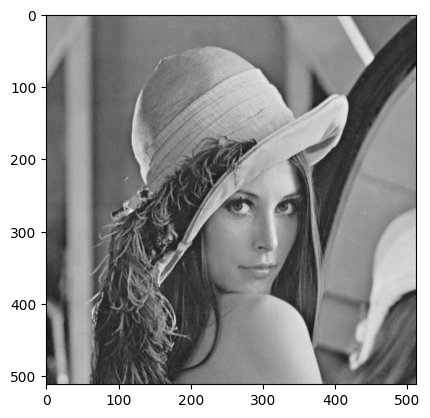

In [14]:
plt.imshow(input_image,cmap='gray',vmin=0,vmax=255)

In [15]:
def integral_imageFunc(image):
    m,n = image.shape
    temp_integralImage = image.astype(np.longlong)
    temp_integralImage = np.cumsum(image,axis=1)
    temp_integralImage2 = np.cumsum(temp_integralImage,axis=0)
    return temp_integralImage2

In [16]:
integralImage = integral_imageFunc(input_image)

[[     162      324      486 ...    69703    69858    69986]
 [     324      648      972 ...   139407   139718   139974]
 [     486      972     1458 ...   209103   209568   209952]
 ...
 [   48468    96939   145645 ... 32280873 32347309 32413825]
 [   48512    97027   145787 ... 32340473 32407013 32473637]
 [   48556    97115   145928 ... 32400074 32466719 32533451]]


In [17]:
def openCv_integral(image):
    intergral_image = cv.integral(image)
    intergral_image = intergral_image[1:,1:]
    return intergral_image

In [18]:
intergralImage_OpenCv = openCv_integral(input_image)

[[     162      324      486 ...    69703    69858    69986]
 [     324      648      972 ...   139407   139718   139974]
 [     486      972     1458 ...   209103   209568   209952]
 ...
 [   48468    96939   145645 ... 32280873 32347309 32413825]
 [   48512    97027   145787 ... 32340473 32407013 32473637]
 [   48556    97115   145928 ... 32400074 32466719 32533451]]


In [19]:
# We get max pixel intensity difference between my integral
# image implementation and opencv's one
image_diff = np.absolute(intergralImage_OpenCv-integralImage)
print(np.max(image_diff))

0.0


In [20]:
KERNEL_SIZE = 3
def box_filter_from_integral_image(original_image,imageIntegral,kernelSize):
    m,n = imageIntegral.shape
    result_image = original_image.copy()
    padding = int(kernelSize/2)
    print(padding)
    divider = float(kernelSize**2)
    print(divider)
    # Code withoud padding (No change to borders)
    for i in range(padding,m-padding):
        for j in range(padding,n-padding):
            if i == padding and j == padding:
                temp_float = (imageIntegral[i+padding,j+padding]/divider)
            elif i == padding and j != padding:
                temp_float = (imageIntegral[i+padding,j+padding]/divider)-(imageIntegral[i+padding,j-padding-1]/divider)
            elif i != padding and j == padding:
                temp_float = (imageIntegral[i+padding,j+padding]/divider)-(imageIntegral[i-padding-1,j+padding]/divider)
            else:
                temp_float = (imageIntegral[i+padding,j+padding]/divider)+(imageIntegral[i-padding-1,j-padding-1]/divider)-(imageIntegral[i-padding-1,j+padding]/divider)-(imageIntegral[i+padding,j-padding-1]/divider)
            
            result_image[i,j] = temp_float.astype(np.uint8)
    
    return result_image

In [21]:
image_box_filtered = box_filter_from_integral_image(input_image,integralImage,KERNEL_SIZE).astype(np.uint8)

2
25.0


1


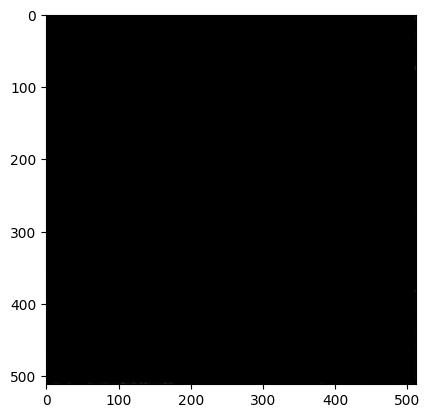

In [22]:
difference_image = image_box_filtered.copy()
kernel = np.ones((KERNEL_SIZE,KERNEL_SIZE),np.float32)/(KERNEL_SIZE**2)
dst = cv.filter2D(input_image,-1,kernel)

m,n = input_image.shape
for i in range(m):
    for j in range(n):
        difference_image[i][j] = abs(int(dst[i][j]) - int(image_box_filtered[i][j]))

# Except the borders our box filter implementation with 
# integral image works fine
half_of_kernel_size = int(KERNEL_SIZE/2)
print(np.max(difference_image[half_of_kernel_size:-half_of_kernel_size,half_of_kernel_size:-half_of_kernel_size]))

plt.imshow(difference_image,cmap='gray',vmin=0,vmax=255)